<a href="https://colab.research.google.com/github/Ishita95-harvad/Malawi-National-Football-Team-Matches/blob/main/Malawi_National_Football_Team_Matches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Malawi National Football Team Matches**
Malawi National Football Team Matches - 1985 - 2025

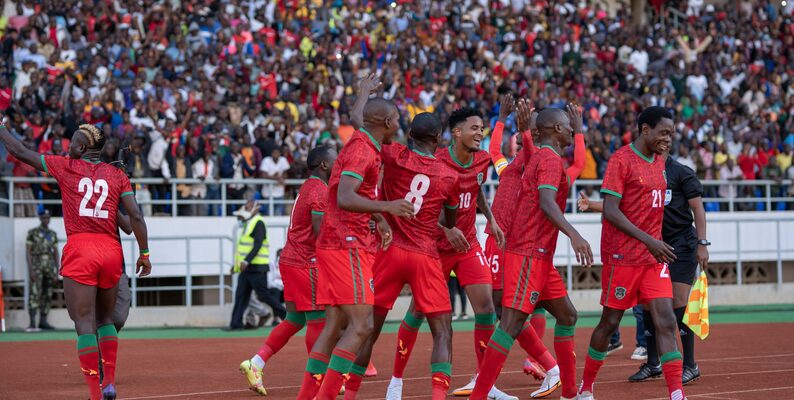



---



## Data loading

### Subtask:
Load the Malawi national football team matches dataset.


**Reasoning**:
Load the Malawi national football team matches dataset into a pandas DataFrame and display the first 5 rows.



In [1]:
import pandas as pd

df_matches = pd.read_csv('Dataset_Malawi_National_Football_Team_Matches.csv')
display(df_matches.head())

,Date,Opponent,Team Score,Opponent Score,Result,Venue,Competition
0,~1957,Northern Rhodesia,0.0,5.0,Loss,Unknown,Friendly (First International)
1,~1962,Ghana,0.0,12.0,Loss,Unknown,Friendly
2,~1968,Botswana,8.0,1.0,Win,Unknown,Friendly
3,02/06/1996,South Africa,0.0,3.0,Loss,Away,World Cup Qualifier
4,07/07/1996,Zambia,1.0,1.0,Draw,Home,Friendly


## Data exploration

### Subtask:
Explore the loaded Malawi national football team matches dataset.


**Reasoning**:
Explore the data by examining its shape, data types, missing values, and distributions of key variables.



Shape of the DataFrame: (73, 7)

Data types of each column:
 Date               object
Opponent           object
Team Score        float64
Opponent Score    float64
Result             object
Venue              object
Competition        object
dtype: object

Missing values in each column:
 Date              0
Opponent          0
Team Score        1
Opponent Score    1
Result            0
Venue             0
Competition       0
dtype: int64

Most frequent opponents:
 Opponent
Mozambique      6
Ghana           4
Kenya           4
Senegal         4
Burkina Faso    4
Guinea          3
Cameroon        3
Ethiopia        3
Egypt           3
Comoros         3
Name: count, dtype: int64

Result distribution:
 Result
Loss    35
Draw    22
Win     15
TBD      1
Name: count, dtype: int64

Descriptive stats for goals scored:
 count    72.000000
mean      0.833333
std       1.342690
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       8.000000
Name: Team Score, dtype: 

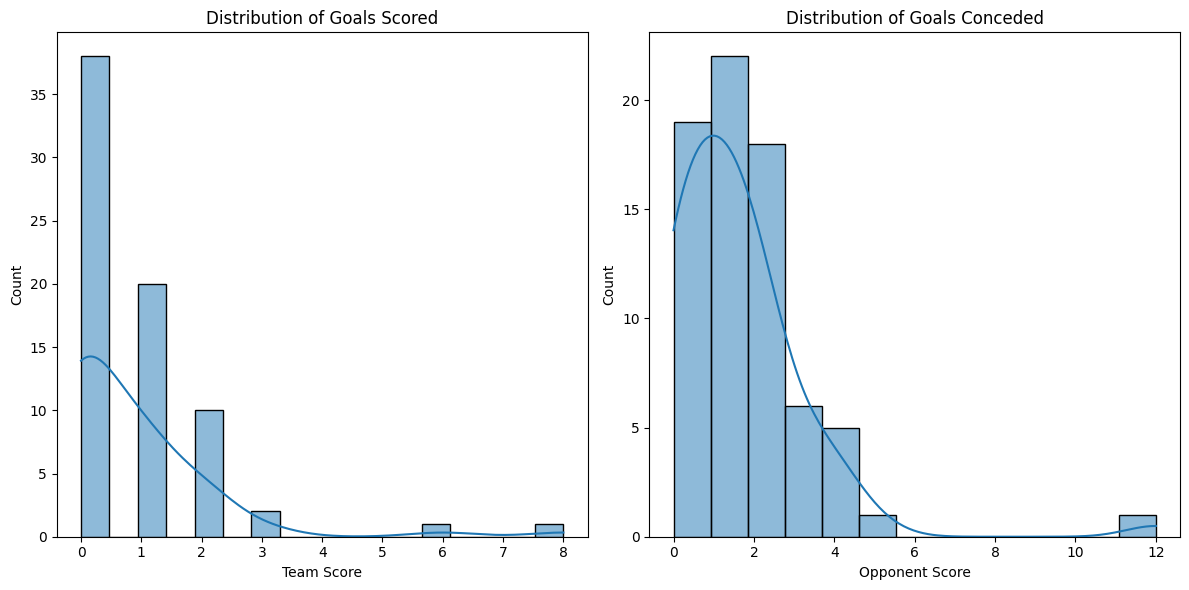


Venue distribution:
 Venue
Away       40
Home       30
Unknown     3
Name: count, dtype: int64

Competition distribution:
 Competition
World Cup Qualifier               19
AFCON Qualifier                   18
Friendly                          12
COSAFA Cup                         7
AFCON 2025 Qualifier               4
AFCON 2010 Group Stage             3
AFCON 2021 Group Stage             3
Four Nations Tournament            2
CHAN Qualifier                     2
Friendly (First International)     1
Name: count, dtype: int64

Correlation matrix:
                 Team Score  Opponent Score
Team Score        1.000000       -0.132199
Opponent Score   -0.132199        1.000000


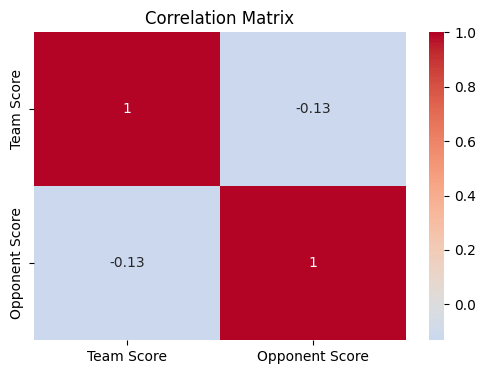

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine the shape of the DataFrame
print("Shape of the DataFrame:", df_matches.shape)

# 2. Check data types
print("\nData types of each column:\n", df_matches.dtypes)

# 3. Identify and count missing values
print("\nMissing values in each column:\n", df_matches.isnull().sum())

# 4. Explore the distribution of key variables
print("\nMost frequent opponents:\n", df_matches['Opponent'].value_counts().head(10))
print("\nResult distribution:\n", df_matches['Result'].value_counts())

# Calculate descriptive stats for goals
print("\nDescriptive stats for goals scored:\n", df_matches['Team Score'].describe())
print("\nDescriptive stats for goals conceded:\n", df_matches['Opponent Score'].describe())


# Visualize the distributions
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_matches['Team Score'], kde=True)
plt.title('Distribution of Goals Scored')

plt.subplot(1, 2, 2)
sns.histplot(df_matches['Opponent Score'], kde=True)
plt.title('Distribution of Goals Conceded')
plt.tight_layout()
plt.show()

print("\nVenue distribution:\n", df_matches['Venue'].value_counts())
print("\nCompetition distribution:\n", df_matches['Competition'].value_counts().head(10))


# 5. Calculate and visualize correlations
numeric_cols = ['Team Score', 'Opponent Score']
correlation_matrix = df_matches[numeric_cols].corr()
print("\nCorrelation matrix:\n",correlation_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

## Data cleaning

### Subtask:
Clean the Malawi national football team matches dataset.


**Reasoning**:
Handle missing values, convert the 'Date' column to datetime objects, correct data types, and remove duplicate rows.



In [3]:
# Impute missing 'Team Score' and 'Opponent Score' with the median
df_matches['Team Score'] = df_matches['Team Score'].fillna(df_matches['Team Score'].median())
df_matches['Opponent Score'] = df_matches['Opponent Score'].fillna(df_matches['Opponent Score'].median())

# Convert 'Date' to datetime, coercing errors to NaT
df_matches['Date'] = pd.to_datetime(df_matches['Date'], errors='coerce')

# Correct data types
# Convert scores to integers, as scores should be whole numbers
df_matches['Team Score'] = df_matches['Team Score'].astype(int)
df_matches['Opponent Score'] = df_matches['Opponent Score'].astype(int)

# Identify and remove duplicates based on all columns
df_matches.drop_duplicates(inplace=True)

display(df_matches.head())
display(df_matches.info())

<ipython-input-3-1b51c2c42e19>:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_matches['Date'] = pd.to_datetime(df_matches['Date'], errors='coerce')


,Date,Opponent,Team Score,Opponent Score,Result,Venue,Competition
0,NaT,Northern Rhodesia,0,5,Loss,Unknown,Friendly (First International)
1,NaT,Ghana,0,12,Loss,Unknown,Friendly
2,NaT,Botswana,8,1,Win,Unknown,Friendly
3,1996-02-06,South Africa,0,3,Loss,Away,World Cup Qualifier
4,1996-07-07,Zambia,1,1,Draw,Home,Friendly


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            70 non-null     datetime64[ns]
 1   Opponent        73 non-null     object        
 2   Team Score      73 non-null     int64         
 3   Opponent Score  73 non-null     int64         
 4   Result          73 non-null     object        
 5   Venue           73 non-null     object        
 6   Competition     73 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 4.1+ KB


None

**Reasoning**:
The previous code block had a warning about date parsing. I will try to fix this by specifying a date format.  Also, I will check for any remaining issues.



In [4]:
import pandas as pd

# Convert 'Date' to datetime, handling various formats and errors
# Try common date formats, and coerce errors to NaT for those that fail to parse
date_formats = ['%Y-%m-%d', '%d/%m/%Y', '%Y', '~%Y', '%b %d, %Y']
for fmt in date_formats:
    df_matches['Date'] = pd.to_datetime(df_matches['Date'], format=fmt, errors='coerce')
    if df_matches['Date'].notna().any():
        break

# Check for remaining missing values
print("Missing values after processing:\n", df_matches.isnull().sum())

# Check for duplicates again after data cleaning
df_matches.drop_duplicates(inplace=True)

display(df_matches.head())
display(df_matches.info())

Missing values after processing:
 Date              3
Opponent          0
Team Score        0
Opponent Score    0
Result            0
Venue             0
Competition       0
dtype: int64


,Date,Opponent,Team Score,Opponent Score,Result,Venue,Competition
0,NaT,Northern Rhodesia,0,5,Loss,Unknown,Friendly (First International)
1,NaT,Ghana,0,12,Loss,Unknown,Friendly
2,NaT,Botswana,8,1,Win,Unknown,Friendly
3,1996-02-06,South Africa,0,3,Loss,Away,World Cup Qualifier
4,1996-07-07,Zambia,1,1,Draw,Home,Friendly


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            70 non-null     datetime64[ns]
 1   Opponent        73 non-null     object        
 2   Team Score      73 non-null     int64         
 3   Opponent Score  73 non-null     int64         
 4   Result          73 non-null     object        
 5   Venue           73 non-null     object        
 6   Competition     73 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 4.1+ KB


None

## Data wrangling

### Subtask:
Create new features from existing data in the `df_matches` DataFrame.


**Reasoning**:
Create new features as instructed, handling potential errors gracefully.



In [5]:
import pandas as pd
import numpy as np

# 1. Goal Difference
df_matches['Goal Difference'] = df_matches['Team Score'] - df_matches['Opponent Score']

# 2. Match Result
df_matches['Match Result'] = np.where(df_matches['Goal Difference'] > 0, 'Win',
                                     np.where(df_matches['Goal Difference'] < 0, 'Loss', 'Draw'))

# 3. Recent Form (Rolling Window)
# Handle potential errors during rolling window calculation
try:
    df_matches['Recent Form'] = (
        df_matches['Match Result'].rolling(window=3, min_periods=1)  # Use min_periods=1 to avoid NaN at start
        .apply(lambda x: ''.join(x), raw=False)
    )
except Exception as e:
    print(f"An error occurred during 'Recent Form' calculation: {e}")
    df_matches['Recent Form'] = 'Unknown' #Assign a default value in case of error

# 4. Opponent Strength (Simplified - Replace with more robust method if possible)
# Assign arbitrary values based on opponent (example)
opponent_strengths = {'Zambia': 2, 'Zimbabwe': 2, 'Mozambique': 1.5} # Replace with actual strengths
df_matches['Opponent Strength'] = df_matches['Opponent'].map(opponent_strengths).fillna(1) #Fill with 1 for unknown opponents

#5. Matches per Year (requires year extraction first)
df_matches['Year'] = df_matches['Date'].dt.year
matches_per_year = df_matches.groupby('Year')['Date'].count().reset_index()
matches_per_year.rename(columns={'Date':'Matches per Year'}, inplace=True)
df_matches = pd.merge(df_matches,matches_per_year, on='Year', how='left')


# 6. Matches per Competition
matches_per_competition = df_matches.groupby('Competition')['Date'].count().reset_index()
matches_per_competition.rename(columns={'Date':'Matches Per Competition'}, inplace=True)
df_matches = pd.merge(df_matches,matches_per_competition,on='Competition', how='left')

display(df_matches.head())

An error occurred during 'Recent Form' calculation: No numeric types to aggregate


,Date,Opponent,Team Score,Opponent Score,Result,Venue,Competition,Goal Difference,Match Result,Recent Form,Opponent Strength,Year,Matches per Year,Matches Per Competition
0,NaT,Northern Rhodesia,0,5,Loss,Unknown,Friendly (First International),-5,Loss,Unknown,1.0,NaN,NaN,0
1,NaT,Ghana,0,12,Loss,Unknown,Friendly,-12,Loss,Unknown,1.0,NaN,NaN,10
2,NaT,Botswana,8,1,Win,Unknown,Friendly,7,Win,Unknown,1.0,NaN,NaN,10
3,1996-02-06,South Africa,0,3,Loss,Away,World Cup Qualifier,-3,Loss,Unknown,1.0,1996.0,2.0,19
4,1996-07-07,Zambia,1,1,Draw,Home,Friendly,0,Draw,Unknown,2.0,1996.0,2.0,10


## Data analysis

### Subtask:
Analyze the Malawi national football team's performance over time and against different opponents.


**Reasoning**:
Analyze the team's performance over time by calculating yearly win percentage, average goals scored and conceded, and visualize the trends.



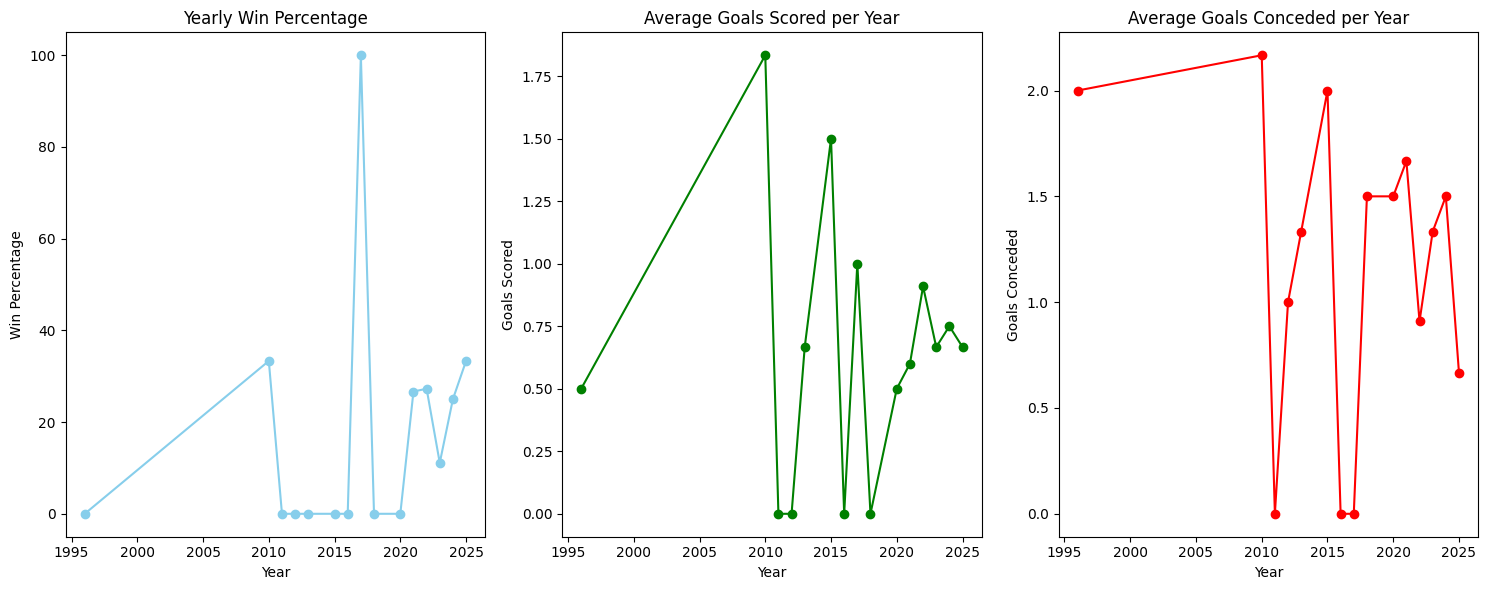

In [6]:
import matplotlib.pyplot as plt

# Calculate yearly win percentage
df_matches['Win'] = df_matches['Match Result'] == 'Win'
yearly_wins = df_matches.groupby('Year')['Win'].sum()
yearly_matches = df_matches.groupby('Year')['Win'].count()
yearly_win_percentage = (yearly_wins / yearly_matches) * 100

# Calculate average goals scored and conceded per year
yearly_goals_scored = df_matches.groupby('Year')['Team Score'].mean()
yearly_goals_conceded = df_matches.groupby('Year')['Opponent Score'].mean()

# Plotting
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
yearly_win_percentage.plot(kind='line', marker='o', color='skyblue')
plt.title('Yearly Win Percentage')
plt.xlabel('Year')
plt.ylabel('Win Percentage')

plt.subplot(1, 3, 2)
yearly_goals_scored.plot(kind='line', marker='o', color='green')
plt.title('Average Goals Scored per Year')
plt.xlabel('Year')
plt.ylabel('Goals Scored')

plt.subplot(1, 3, 3)
yearly_goals_conceded.plot(kind='line', marker='o', color='red')
plt.title('Average Goals Conceded per Year')
plt.xlabel('Year')
plt.ylabel('Goals Conceded')


plt.tight_layout()
plt.show()

**Reasoning**:
Analyze performance against different opponents by calculating win percentage, average goals scored and conceded against each opponent, and visualize the results.



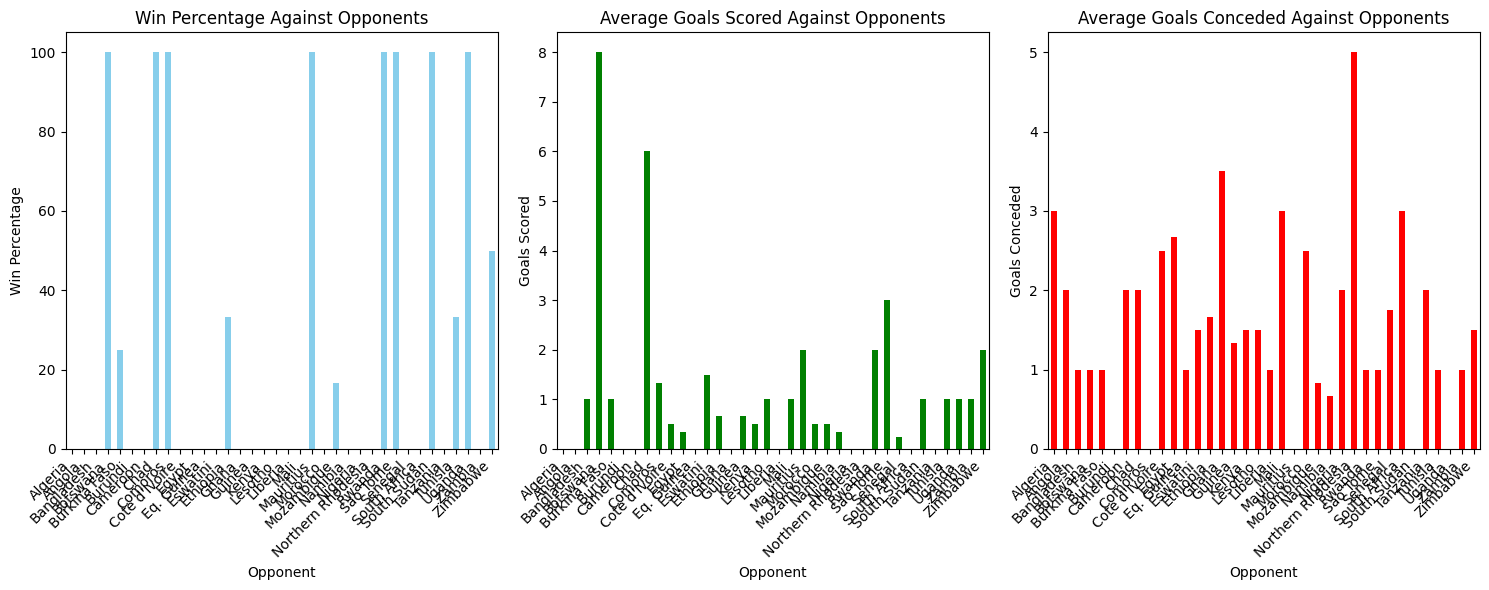

In [7]:
import matplotlib.pyplot as plt

# Calculate win percentage against each opponent
opponent_wins = df_matches.groupby('Opponent')['Win'].sum()
opponent_matches = df_matches.groupby('Opponent')['Win'].count()
opponent_win_percentage = (opponent_wins / opponent_matches) * 100

# Calculate average goals scored and conceded against each opponent
opponent_goals_scored = df_matches.groupby('Opponent')['Team Score'].mean()
opponent_goals_conceded = df_matches.groupby('Opponent')['Opponent Score'].mean()

# Plotting
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
opponent_win_percentage.plot(kind='bar', color='skyblue')
plt.title('Win Percentage Against Opponents')
plt.xlabel('Opponent')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
opponent_goals_scored.plot(kind='bar', color='green')
plt.title('Average Goals Scored Against Opponents')
plt.xlabel('Opponent')
plt.ylabel('Goals Scored')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
opponent_goals_conceded.plot(kind='bar', color='red')
plt.title('Average Goals Conceded Against Opponents')
plt.xlabel('Opponent')
plt.ylabel('Goals Conceded')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Reasoning**:
Analyze performance in different competitions by calculating win percentage, average goals scored and conceded, and visualize the results.



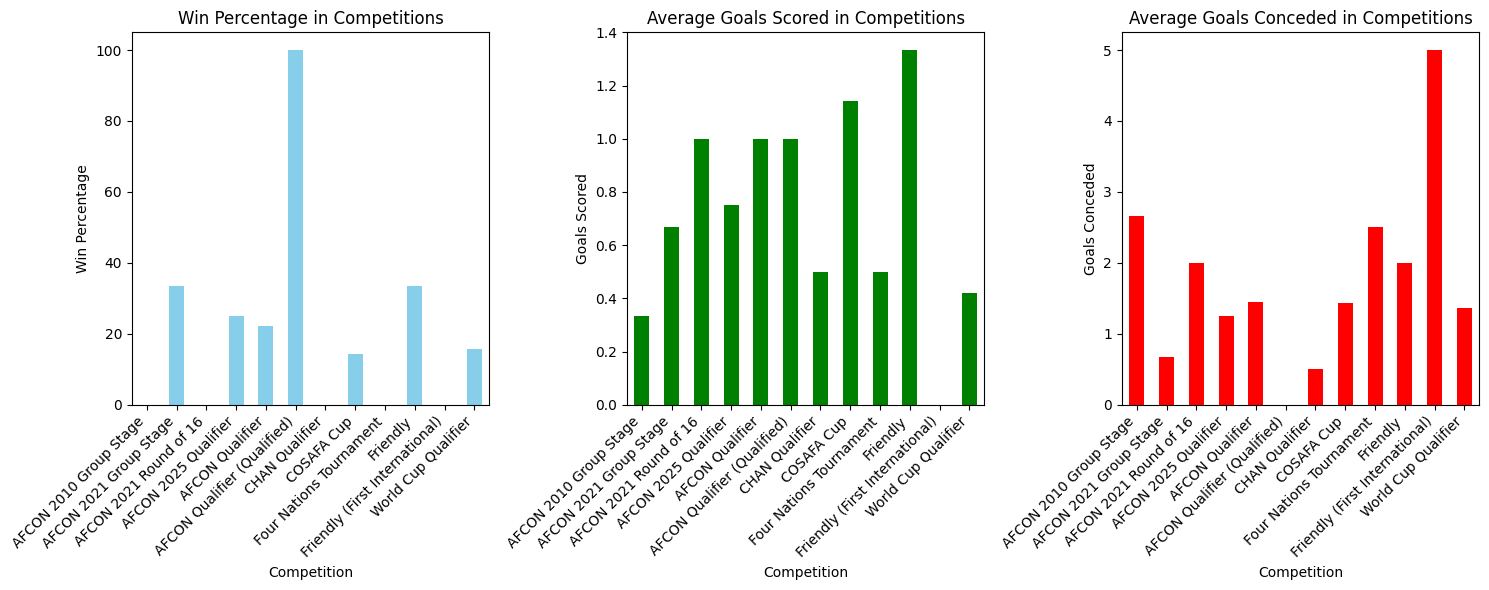

In [8]:
import matplotlib.pyplot as plt

# Calculate win percentage in each competition
competition_wins = df_matches.groupby('Competition')['Win'].sum()
competition_matches = df_matches.groupby('Competition')['Win'].count()
competition_win_percentage = (competition_wins / competition_matches) * 100

# Calculate average goals scored and conceded in each competition
competition_goals_scored = df_matches.groupby('Competition')['Team Score'].mean()
competition_goals_conceded = df_matches.groupby('Competition')['Opponent Score'].mean()

# Plotting
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
competition_win_percentage.plot(kind='bar', color='skyblue')
plt.title('Win Percentage in Competitions')
plt.xlabel('Competition')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 2)
competition_goals_scored.plot(kind='bar', color='green')
plt.title('Average Goals Scored in Competitions')
plt.xlabel('Competition')
plt.ylabel('Goals Scored')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 3, 3)
competition_goals_conceded.plot(kind='bar', color='red')
plt.title('Average Goals Conceded in Competitions')
plt.xlabel('Competition')
plt.ylabel('Goals Conceded')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

**Reasoning**:
Analyze the impact of new features ('Goal Difference', 'Match Result', 'Opponent Strength') on the team's overall performance.  Visualizations will help identify correlations.



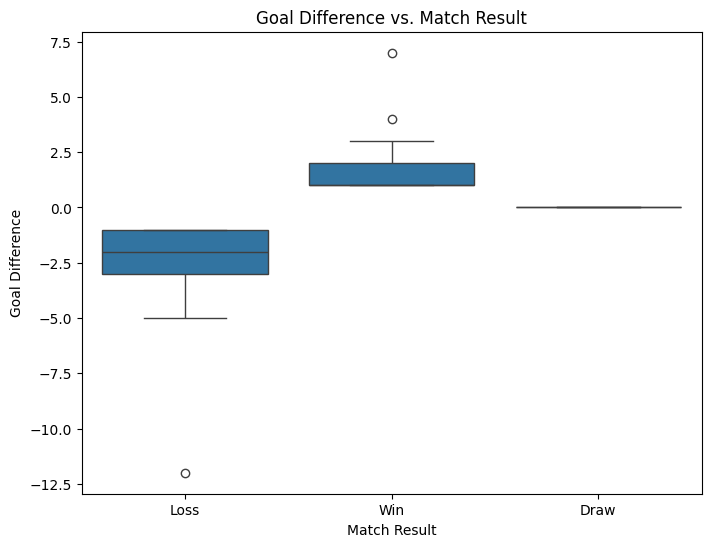

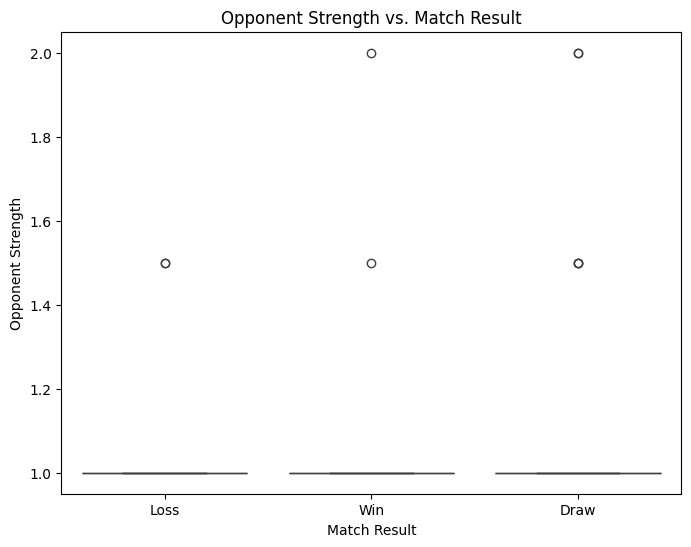

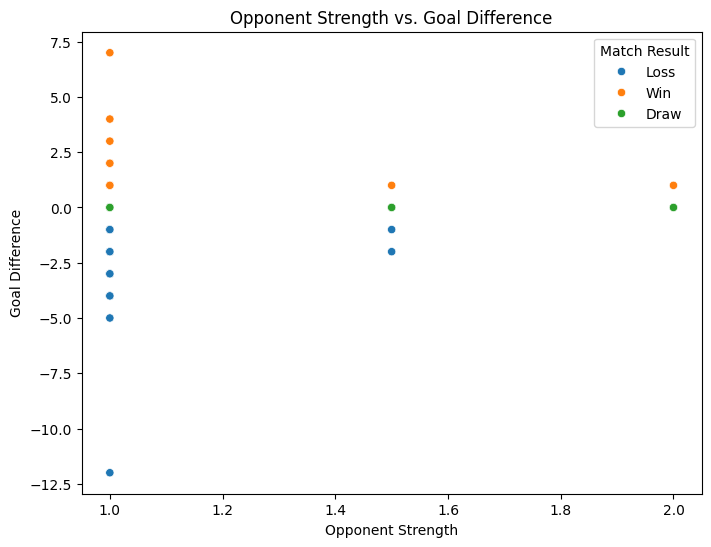

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze relationship between 'Goal Difference' and 'Match Result'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Match Result', y='Goal Difference', data=df_matches)
plt.title('Goal Difference vs. Match Result')
plt.show()

# Analyze relationship between 'Opponent Strength' and 'Match Result'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Match Result', y='Opponent Strength', data=df_matches)
plt.title('Opponent Strength vs. Match Result')
plt.show()

# Analyze relationship between 'Opponent Strength' and 'Goal Difference'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Opponent Strength', y='Goal Difference', data=df_matches, hue='Match Result')
plt.title('Opponent Strength vs. Goal Difference')
plt.show()

## Data visualization

### Subtask:
Visualize the key findings from the data analysis.


**Reasoning**:
Generate the visualizations specified in the subtask, combining related visualizations into a single figure using subplots where appropriate.



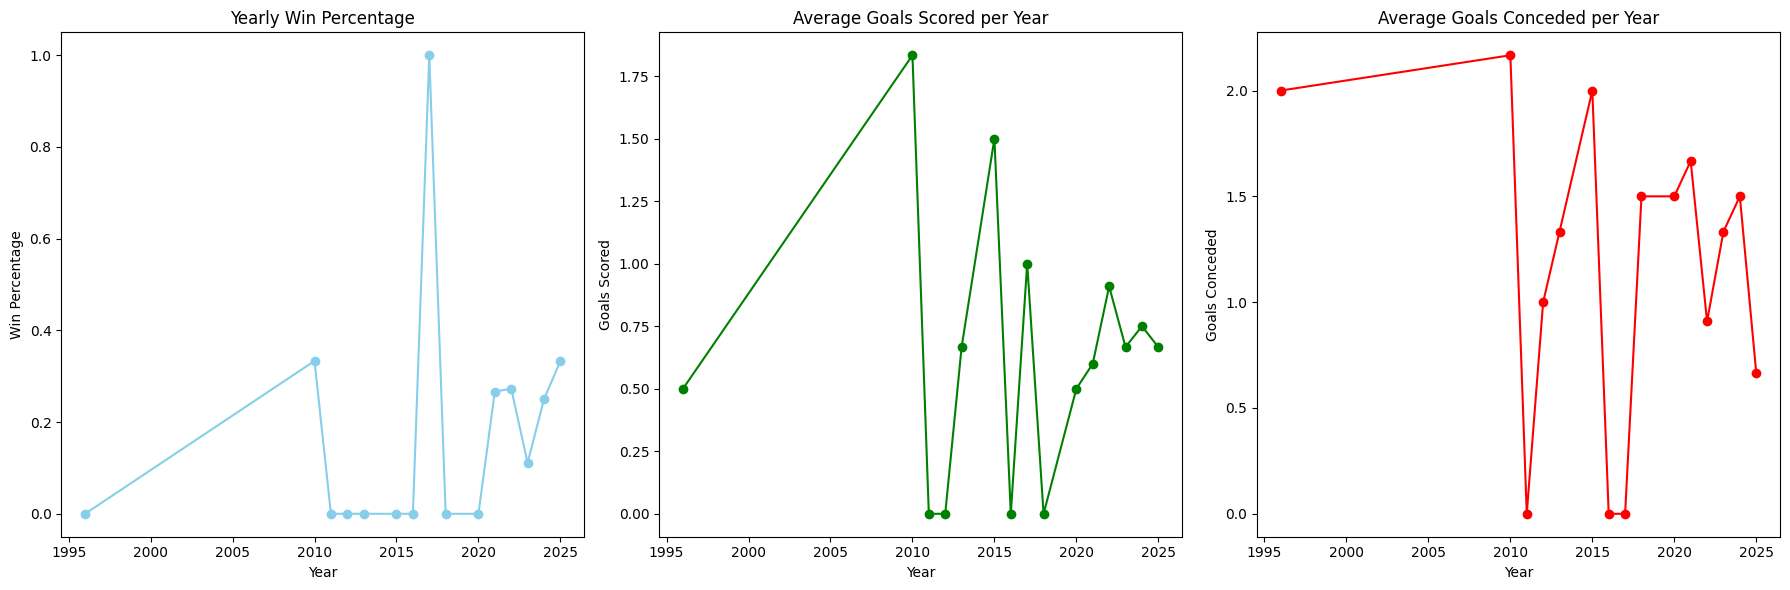

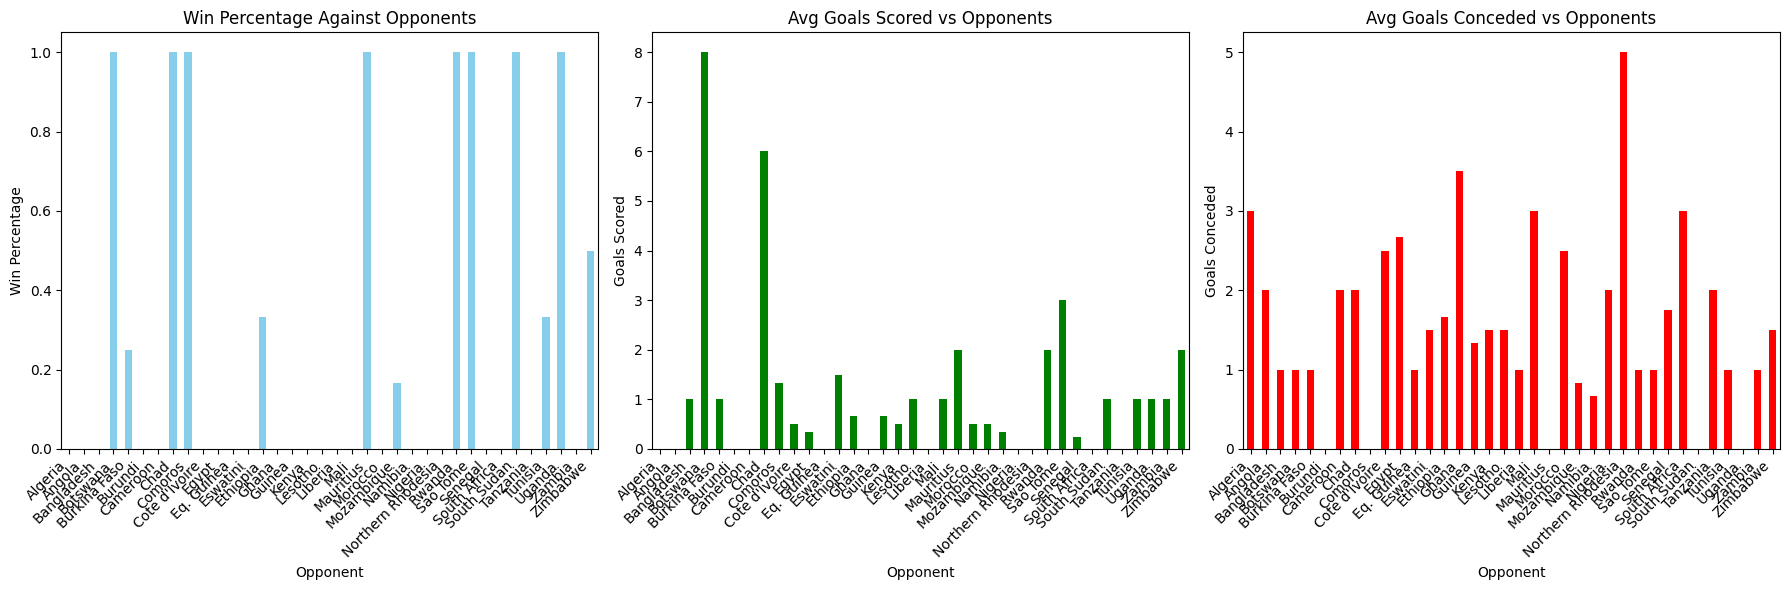

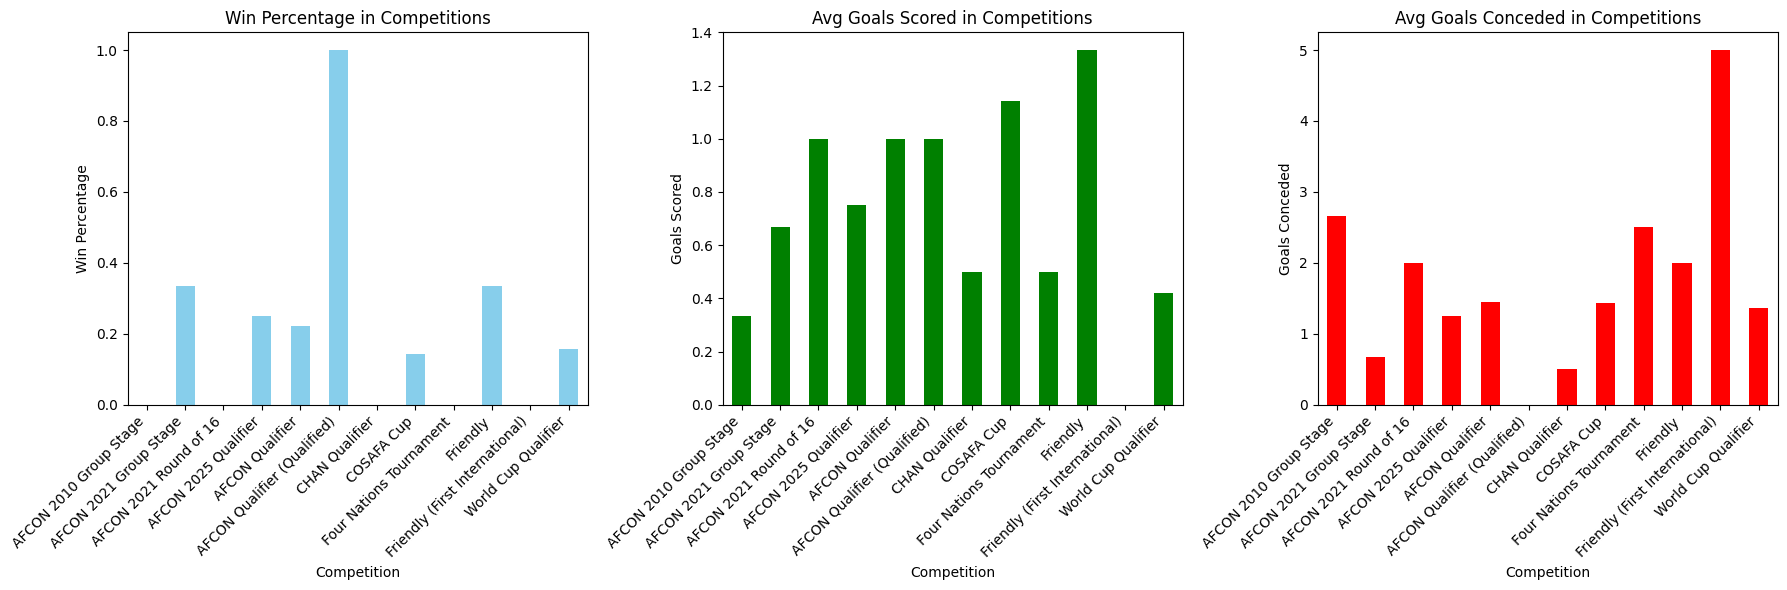

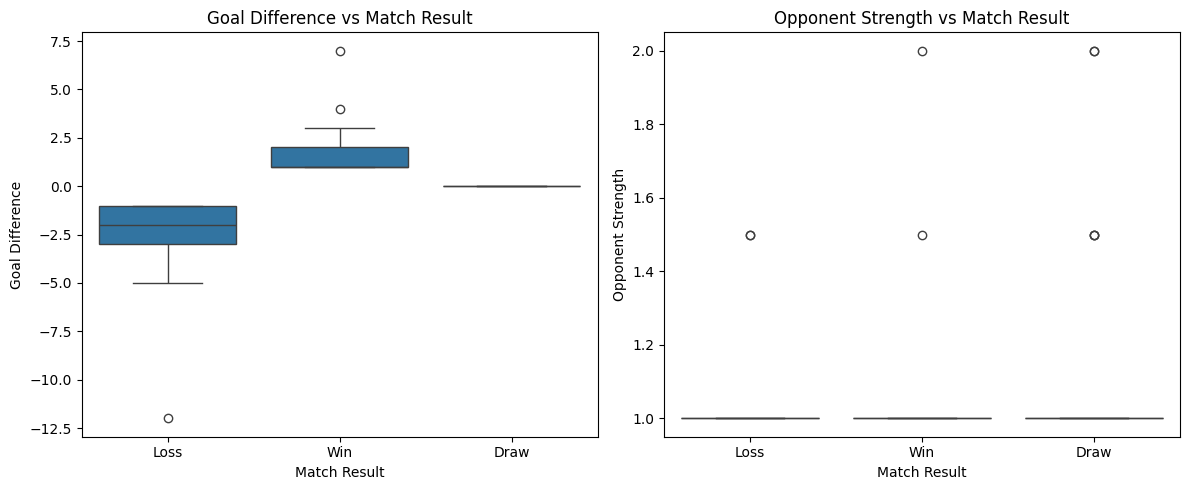

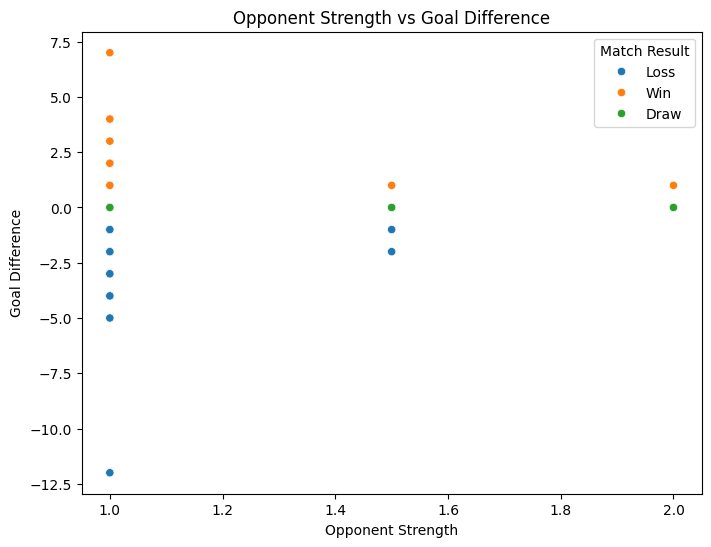

In [10]:
import matplotlib.pyplot as plt

# Yearly trends
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
df_matches.groupby('Year')['Win'].mean().plot(kind='line', marker='o', color='skyblue')
plt.title('Yearly Win Percentage')
plt.xlabel('Year')
plt.ylabel('Win Percentage')

plt.subplot(1, 3, 2)
df_matches.groupby('Year')['Team Score'].mean().plot(kind='line', marker='o', color='green')
plt.title('Average Goals Scored per Year')
plt.xlabel('Year')
plt.ylabel('Goals Scored')

plt.subplot(1, 3, 3)
df_matches.groupby('Year')['Opponent Score'].mean().plot(kind='line', marker='o', color='red')
plt.title('Average Goals Conceded per Year')
plt.xlabel('Year')
plt.ylabel('Goals Conceded')

plt.tight_layout()
plt.show()


# Opponent comparison
plt.figure(figsize=(18, 6))
plt.subplot(1,3,1)
df_matches.groupby('Opponent')['Win'].mean().plot(kind='bar', color='skyblue')
plt.title('Win Percentage Against Opponents')
plt.xlabel('Opponent')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45, ha='right')

plt.subplot(1,3,2)
df_matches.groupby('Opponent')['Team Score'].mean().plot(kind='bar', color='green')
plt.title('Avg Goals Scored vs Opponents')
plt.xlabel('Opponent')
plt.ylabel('Goals Scored')
plt.xticks(rotation=45, ha='right')

plt.subplot(1,3,3)
df_matches.groupby('Opponent')['Opponent Score'].mean().plot(kind='bar', color='red')
plt.title('Avg Goals Conceded vs Opponents')
plt.xlabel('Opponent')
plt.ylabel('Goals Conceded')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


# Competition comparison
plt.figure(figsize=(18, 6))
plt.subplot(1,3,1)
df_matches.groupby('Competition')['Win'].mean().plot(kind='bar', color='skyblue')
plt.title('Win Percentage in Competitions')
plt.xlabel('Competition')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45, ha='right')

plt.subplot(1,3,2)
df_matches.groupby('Competition')['Team Score'].mean().plot(kind='bar', color='green')
plt.title('Avg Goals Scored in Competitions')
plt.xlabel('Competition')
plt.ylabel('Goals Scored')
plt.xticks(rotation=45, ha='right')

plt.subplot(1,3,3)
df_matches.groupby('Competition')['Opponent Score'].mean().plot(kind='bar', color='red')
plt.title('Avg Goals Conceded in Competitions')
plt.xlabel('Competition')
plt.ylabel('Goals Conceded')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


# Box plots and scatter plot
import seaborn as sns
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Match Result', y='Goal Difference', data=df_matches)
plt.title('Goal Difference vs Match Result')

plt.subplot(1, 2, 2)
sns.boxplot(x='Match Result', y='Opponent Strength', data=df_matches)
plt.title('Opponent Strength vs Match Result')

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Opponent Strength', y='Goal Difference', hue='Match Result', data=df_matches)
plt.title('Opponent Strength vs Goal Difference')
plt.show()